In [1]:
import wisardpkg as wp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


In [2]:
MNIST = fetch_openml('mnist_784', version=1, as_frame=False)

X = MNIST.data
y = MNIST.target.astype(int)

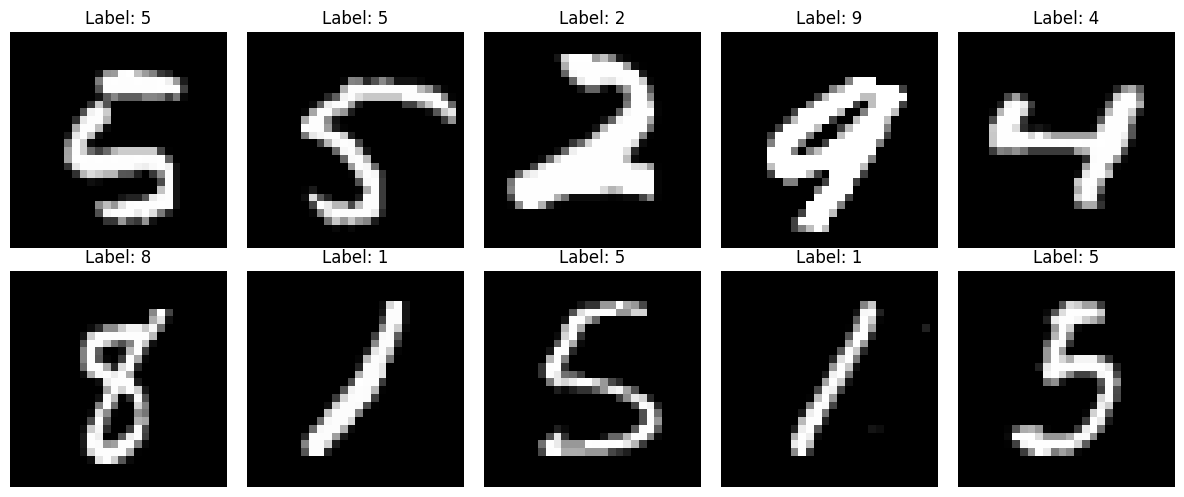

In [3]:
indices = np.random.choice(len(X), 10, replace=False)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax, idx in zip(axes.flatten(), indices):
    ax.imshow(X[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()



In [4]:
kc = wp.KernelCanvas(784, 10, bitsByKernel=3, activationDegree=0.07, useDirection=False)

In [5]:
type(X[0])

numpy.ndarray

In [6]:
X_reshaped = X.reshape(-1, 28, 28)
X_reshaped[0].shape
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)


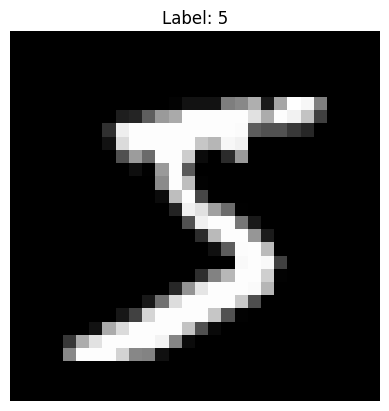

In [7]:
def drawFig(idx):
    plt.imshow(X_reshaped[idx], cmap='gray')
    plt.title(f"Label: {y[idx]}")
    plt.axis('off')
    plt.show()
    
drawFig(0)

In [8]:
from abc import ABC, abstractmethod

class KernelCanvas(ABC):
    def __init__(self) -> None:
        super().__init__()
        
    @abstractmethod
    def makeKernel(self):
        pass

In [9]:
class RandomKernelCanvas(KernelCanvas):
    def __init__(self, shape : tuple, numberOfKernels : int, bitsByKernel : int = 3, activationDegree : float = 0.07):
        self.numberOfKernels = numberOfKernels
        self.bitsByKernel = bitsByKernel
        self.activationDegree = activationDegree
        self.shape = shape
        self.closestKernel: dict[tuple[int, int], int] = {}
        super().__init__()
        
        self.makeKernel()
        self.findClosestKernels()
        
    def squareDistance(self, x, y):
        return np.sum(np.pow(x - y, 2))
        
    def makeKernel(self):
        points = np.random.choice(np.prod(self.shape), size=self.numberOfKernels, replace=False)
        self.kernel_points = [(point // self.shape[1], point % self.shape[1]) for point in points]
        
    def showKernelPoints(self):
        canvas = np.ones((*self.shape, 3))  # All white squares, RGB

        # Paint the kernel points red
        for row, col in self.kernel_points:
            canvas[row, col] = [1, 0, 0]  # Red color (R=1, G=0, B=0)

        fig, ax = plt.subplots()
        ax.imshow(canvas, vmin=0, vmax=1)
        plt.show()
        
    def findClosestKernels(self):
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                self.closestKernel[(i, j)] = int(self.findClosestKernel((i, j)))
        
    def findClosestKernel(self, x):
        distances = [self.squareDistance(x, np.array(self.kernel_points[i])) for i in range(self.numberOfKernels)]
        return np.argmin(distances)
        
    def showCanvas(self):
        canvas = np.ones((*self.shape, 3))  # All white squares, RGB

        # Paint the kernel points red
        for row, col in self.kernel_points:
            canvas[row, col] = [1, 0, 0]  # Red color (R=1, G=0, B=0)
        
        fig, ax = plt.subplots()
        ax.imshow(canvas, vmin=0, vmax=1)
        
         # Add numbers to each square
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                ax.text(j, i, str(self.findClosestKernel((i, j))), 
                        va='center', ha='center', color='black', fontsize=6)

        plt.show()
        
    def transform(self, data) -> list:
        if data.shape != self.shape:
            raise ValueError(f"Input data shape {data.shape} does not match expected shape {self.shape}")
        ret = [0 for _ in range(self.numberOfKernels)]
        # ret = np.zeros(self.numberOfKernels, dtype=int)
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                kernel_index = self.closestKernel[(i, j)]
                if(data[i, j] > self.activationDegree):
                    ret[kernel_index] = 1
        return ret
    
    def showTransformed(self, TransformedData):
        if len(TransformedData) != self.numberOfKernels:
            raise ValueError(f"Transformed data length {len(TransformedData)} does not match number of kernels {self.numberOfKernels}")
        
        canvas = np.ones((*self.shape, 3))  # All white squares, RGB

        
        
        # paint the activated kernels
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                if(TransformedData[self.closestKernel[(i, j)]]):
                    canvas[i, j] = [0, 0, 0]

        # Paint the kernel points red
        for row, col in self.kernel_points:
            canvas[row, col] = [1, 0, 0]  # Red color (R=1, G=0, B=0)
            
        fig, ax = plt.subplots()
        ax.imshow(canvas, vmin=0, vmax=1)
        plt.show()
                    
                

In [10]:
tst = RandomKernelCanvas((28, 28), 16, bitsByKernel=1, activationDegree=0.07)
tst.kernel_points

[(np.int64(0), np.int64(5)),
 (np.int64(15), np.int64(20)),
 (np.int64(11), np.int64(26)),
 (np.int64(26), np.int64(5)),
 (np.int64(5), np.int64(19)),
 (np.int64(12), np.int64(12)),
 (np.int64(13), np.int64(26)),
 (np.int64(21), np.int64(0)),
 (np.int64(24), np.int64(22)),
 (np.int64(3), np.int64(26)),
 (np.int64(15), np.int64(6)),
 (np.int64(25), np.int64(6)),
 (np.int64(6), np.int64(15)),
 (np.int64(21), np.int64(8)),
 (np.int64(15), np.int64(5)),
 (np.int64(19), np.int64(20))]

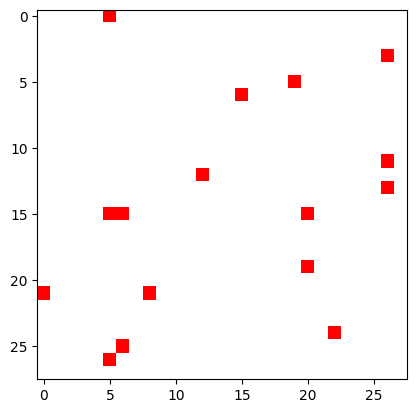

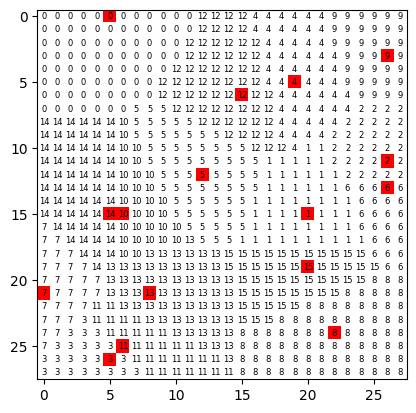

In [11]:
tst.showKernelPoints()
tst.showCanvas()

[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]


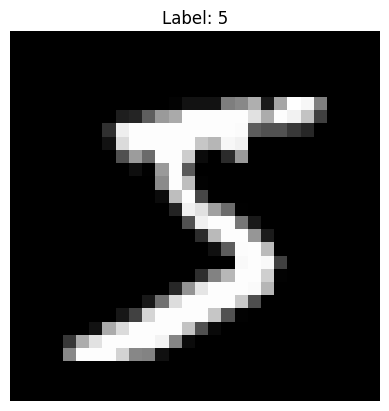

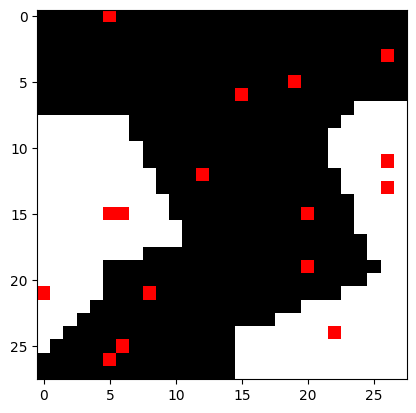

In [12]:
print(tst.transform(X_reshaped[0]))
drawFig(0)
tst.showTransformed(tst.transform(X_reshaped[0]))

In [ ]:
from concurrent.futures import ProcessPoolExecutor

with ProcessPoolExecutor() as executor: train_points = list(executor.map(tst.transform, X_train))
with ProcessPoolExecutor() as executor: test_points = list(executor.map(tst.transform, X_test))


# train_points = np.array(train_points)
# test_points = np.array(test_points)
train_ds = wp.DataSet(train_points, y_train)
test_ds = wp.DataSet(test_points, y_test)

In [25]:
np.array(train_points)

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 1, 1]], shape=(56000, 16))

```
addressSize=3

wsd = Wisard(
   addressSize,              # required
   bleachingActivated=True,  # optional
   ignoreZero=False,         # optional
   completeAddressing=True,  # optional
   verbose=False,            # optional
   indexes=[],               # optional
   base=2,                   # optional
   confidence=1,             # optional

   ## types of return of classify
   returnActivationDegree=False, # optional
   returnConfidence=False,       # optional
   returnClassesDegrees=False    # optional
)
```


In [32]:
model = wp.Wisard(4, bleaching=False, verbose=True)


In [27]:
train_ds.get(0)[0]

0

In [33]:
model.train(train_ds)

IndexError: unordered_map::at

training 1 of 56000

In [ ]:
pred = model.classify(test_ds)

In [ ]:
model.classify(test_ds[0])

''

In [ ]:
def accuracy(y_pred, y_target):
  return np.where(y_pred == y_target, 1, 0).sum()/len(y_target)

accuracy(pred, y_test)

np.float64(0.0)